# Property price Prediction - Model Building

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# import warnings
import warnings
warnings.filterwarnings("ignore")

# label encoding : Using pd.get_dummies

# for handling sknerness
from scipy.stats import skew

# for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# scaling data
from sklearn.preprocessing import StandardScaler

# train test split
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
import statsmodels.api as stm
import scipy.stats as stats
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import VotingRegressor

# Evaluation matrix
from sklearn.metrics import r2_score,mean_squared_error

#importing pickle for saving model
import pickle

In [2]:
df=pd.read_csv(r"C:\Users\VISHAL\Web Deployment\House Price Prediction\data\Exported_data\concatedTrainTest.csv",
              index_col=0,header=0)
print(df.shape)
df.head()

(2575, 218)


,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Con

# Splitting Data into Train and Test

In [3]:
train=df.loc[:1460,:]
test=df.loc[1460:,:]

In [4]:
print(train.shape)
train.head()

(1459, 218)


,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Con

In [5]:
test.drop(["Sale_Price"],axis=1,inplace=True)
print(test.shape)
test.head()

(1116, 217)


,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Con

# Model Building

## Linear Regression

## Using Training dataset we can create X and Y

In [6]:
X=train.iloc[:,:-1]
Y=train.iloc[:,-1]

In [7]:
print("X=",X.shape)
print("Y=",Y.shape)

X= (1459, 217)
Y= (1459,)


In [8]:
print("Y minimum =",Y.min())
print("Y maximum =",Y.max())

Y minimum = 34900.0
Y maximum = 755000.0


<AxesSubplot:xlabel='Sale_Price', ylabel='Density'>

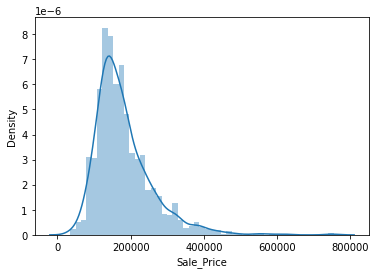

In [9]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [10]:
# Y_log  = np.log(Y)
# sns.distplot(Y_log,hist=True)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [12]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

# print (model_linear.intercept_)
# print (model_linear.coef_)

Y_pred=model_linear.predict(X_test)
print(Y_pred)

[179491.94160786 205339.53411283 135964.79305056 136767.54089944
 328112.9007164  224379.57073797 282083.78618309  92382.15614963
 193648.29873151 172811.27369672 129297.79723238 159939.86043388
 191426.52116293  88862.38054374 216890.0339574  203555.77404632
 279527.33698577 228570.34258415 202122.87614342 191898.72372944
 234092.93523807 111673.39950542 111386.1899646  245295.2756641
 207130.28403888 149669.56389176 189024.38017209 103641.14443825
 156727.68771198 197584.17438966 112394.55903352 154128.54427357
 123181.01072708  97618.20726183 144930.13039678  34960.72116125
 179412.38438857 214365.09028243 333129.25653908 172045.56593413
 198523.81027314 137004.38000843  79497.15201026 267334.01118575
 210068.58397982 219297.20023476 276085.07461058 136556.85434488
  98983.75876788 166886.26342043 208458.38501835  10351.72194593
 183413.66589907 115462.50461598 227286.97586402 117179.6134149
 201078.86291487 186017.11913791 168506.56903013 166885.47972442
 118641.70868717 191542.085

In [13]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8425937322373203
29983.369768028024
0.8150698320725326


## Ridge Regression

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [15]:
model_ridge = Ridge()
model_ridge.fit(X_train,Y_train)

# print (ridge.intercept_)
# print (ridge.coef_)

Y_pred=model_ridge.predict(X_test)
print(Y_pred)

[181642.17187237 204166.15856957 137181.74966164 138876.02311861
 325865.67303346 230912.2117699  278220.07071045  92293.25247552
 188412.51049383 172340.09850841 130977.27587786 161686.02853184
 190351.6162863   98001.10982747 217006.86491504 199461.83641877
 281932.61542516 202142.73369228 203797.86486453 190552.98708011
 233929.26064332 111411.3630562  111708.36389182 246641.26943632
 225547.00947745 153489.18511526 193722.42408754 100818.9545701
 147678.72533624 198951.23619843 112365.25459987 154860.51049198
 123678.48933241  99466.46074627 145242.16595598  34892.54787508
 180032.8816317  214861.61679967 329849.31971036 177824.31625532
 200869.28209522 134863.40764706  79393.99081027 262335.73935817
 210575.52007277 212107.31414318 272308.74803367 135799.74808719
  99919.1583402  165812.2071225  208137.38260848   9499.14563115
 183939.74936761 115905.17457098 226783.94075767 122589.48203097
 201960.76159504 183162.8263715  162382.95659066 166292.84557111
 119686.45340216 194213.69

In [16]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8602799361696489
28248.72284060197
0.8358486276674844


## Lasso Regression

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [18]:
model_lasso = Lasso()
model_lasso.fit(X_train,Y_train)

# print (lasso.intercept_)
# print (lasso.coef_)

Y_pred=model_lasso.predict(X_test)
print(Y_pred)

[179548.20581133 205299.71107433 136064.80196097 137056.51098958
 328078.34405907 224576.23445818 281925.52384547  92363.86996988
 192780.8165521  172627.74316217 129454.07922695 160009.35592158
 191448.36346113  90039.17922881 216845.25253236 202926.25736319
 279616.03641042 227742.19997683 202285.90983883 192006.72357691
 233957.23506819 111635.32020991 111438.83714131 245276.82440524
 208620.75756715 149846.53379414 189335.5635226  103494.51796349
 155484.15137573 197616.802237   112221.87442559 154138.94486434
 123187.01690528  97688.92533541 144867.30566022  35017.46536387
 179166.88927749 214349.00448117 333217.35487458 172009.40205905
 198688.16033685 136658.7270126   79520.25876927 266776.87612665
 210067.01638637 219025.08340933 275575.91968748 135978.0729346
  99156.86145951 166828.0967963  208351.6699261   10408.4206917
 183325.73759121 115517.11611363 227224.64966057 117479.86671089
 201133.2075389  185789.03756255 168118.07585519 166677.04764608
 118767.2675977  192566.999

In [19]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8444747954914211
29803.675107871622
0.8172798161373828


## OLS

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [21]:
new_df=pd.DataFrame()
new_df=X_train

new_df["Sale_Price"]=Y_train
new_df.shape

(1021, 218)

In [22]:
ols_model = sm.ols(formula='Y_train~ X_train', data=new_df).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.232e+28
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:48:50   Log-Likelihood:                 20082.
No. Observations:                1021   AIC:                        -3.980e+04
Df Residuals:                     837   BIC:                        -3.889e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.164e-10   5.83e-09      0.020   

In [23]:
# Y_pred_new=ols_model.predict(X_test)

# r2=r2_score(Y_test,Y_pred_new)
# print(r2)

# rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
# print(rmse)

# adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
# print(adjusted_r_squared)

## Post model building assumption 

## Q-Q plot

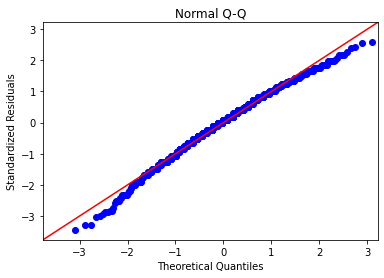

In [24]:
## Quantile-Quantile plots
res = ols_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

## Ensemble Model

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [26]:
estimators = []
model1= LinearRegression()
estimators.append(('lr', model1))

model2=Ridge()
estimators.append(('rid', model2))

model3=Lasso()
estimators.append(('las', model3))


# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)


[180227.43976385 204935.13458558 136403.78155772 137566.69166921
 327352.30593631 226622.67232202 280743.126913    92346.42619834
 191613.87525914 172593.03845577 129909.71744573 160545.0816291
 191075.50030346  92300.88986667 216914.05046827 201981.28927609
 280358.66294045 219485.09208442 202735.55028226 191486.14479549
 233993.14364986 111573.36092384 111511.13033257 245737.78983522
 213766.01702783 151001.76093372 190694.12259408 102651.53899061
 153296.85480799 198050.73760836 112327.22935299 154375.99987663
 123348.83898826  98257.86444783 145013.20067099  34956.91146673
 179537.38509925 214525.23718775 332065.31037467 173959.76141617
 199360.4175684  136175.50488936  79470.4671966  265482.20889019
 210237.04014632 216809.86592909 274656.58077724 136111.55845556
  99353.25952253 166508.85577975 208315.81251764  10086.42942293
 183559.7176193  115628.26510019 227098.52209409 119082.98738558
 201390.94401627 184989.66102399 166335.86715866 166618.4576472
 119031.80989568 192774.258

In [27]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8502595087808152
29244.153625115345
0.8240760385192818


## K-Fold Validation

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [35]:
# regressor=LinearRegression()                # 0.7602721601180783 
regressor=Ridge()                             # 0.7811414163333379
# regressor = Lasso()                         # 0.7605606473438982
# regressor = VotingRegressor(estimators)     # 0.7688315399552094

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=regressor,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.86809533 0.83941057 0.77906481 0.88815899 0.48688316 0.90250287
 0.69008992 0.80400572 0.80742127 0.74578153]
0.7811414163333379


# Using Training dataset we can create X and Y

In [36]:
X=train.iloc[:,:-1]
Y=train.iloc[:,-1]

In [37]:
print("X=",X.shape)
print("Y=",Y.shape)

X= (1459, 217)
Y= (1459,)


In [38]:
print("Y minimum =",Y.min())
print("Y maximum =",Y.max())

Y minimum = 34900.0
Y maximum = 755000.0


## Scaling Data

In [39]:
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

## SGD Regressor

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [41]:
regressor_SGD=SGDRegressor(learning_rate="constant",eta0=0.01,shuffle=True,random_state=10,max_iter=1000,
                            early_stopping=True,n_iter_no_change=5)
regressor_SGD.fit(X_train,Y_train)


Y_pred=regressor_SGD.predict(X_test)

# print(list(zip(diabeties_rev.columns[:-1],regressor.coef_.ravel())))
# print(classifier.intercept_)
print(Y_pred)

[-1.13866115e+12 -2.84847121e+11  1.07322670e+11  3.35355829e+11
 -6.25641486e+11  3.23849641e+11 -2.92483445e+11 -1.01899711e+11
  2.15448014e+11  4.84795493e+11  2.11382092e+11 -1.60411862e+11
 -3.23073554e+11 -2.04873821e+11 -1.11617517e+11  3.46390462e+11
 -1.51955607e+11  1.69752714e+11  5.21711621e+11 -2.20751313e+11
 -2.89470590e+10 -6.71180382e+11 -1.01049525e+11 -8.94460367e+10
 -4.84605921e+12  5.14699001e+11  3.67481792e+11  1.36080498e+12
  3.66799644e+11  3.89974592e+11  9.02343486e+10  4.82069459e+11
 -3.73483626e+11  6.46691581e+11 -1.12977249e+12  2.41272914e+11
 -2.75130289e+11 -1.55091893e+10 -6.07254710e+11 -1.16662354e+12
 -4.65107078e+11  1.02219087e+11  9.48593553e+11 -3.96817599e+11
 -1.31366814e+11 -5.22973798e+11 -1.04509480e+12  8.23587481e+11
 -1.25913535e+11  4.40734282e+11  4.06028283e+10  5.36872966e+11
 -6.16237320e+11 -7.44334584e+11 -2.31943538e+11  7.01637874e+11
 -4.02394213e+11  5.75773922e+11 -5.17826831e+11  5.55431560e+11
 -2.47813604e+11  2.91301

In [42]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

-156961673377281.53
946817420629.889
-184407832219239.88


## Tune SGD Regressor

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [44]:
regressor_SGD_tune=SGDRegressor(learning_rate="constant",eta0=0.0001,shuffle=True,random_state=10,max_iter=1000,
                            early_stopping=True,n_iter_no_change=60)
regressor_SGD_tune.fit(X_train,Y_train)


Y_pred=regressor_SGD_tune.predict(X_test)

# print(list(zip(diabeties_rev.columns[:-1],regressor.coef_.ravel())))
# print(classifier.intercept_)
print(Y_pred)

[181201.44308149 205194.28717649 139043.13565433 136319.36069351
 327545.20962647 224378.94449347 252579.24758853  99439.76396498
 194250.10296183 171666.93634738 133938.8100302  164118.52528188
 194195.22375791 106174.05937298 213519.86000198 192308.43610939
 276316.9818354  220852.91668233 200524.88200114 191243.53303309
 235650.87878298 118659.48370148 114857.36311463 239563.39013213
 244140.21719955 147683.36976329 194764.22605283  95246.06701759
 146532.87044501 198055.34072856 117784.58241832 154371.72905983
 124328.16800806 104057.90090626 137747.86500042  52580.00199397
 172227.70368373 211715.06175605 338412.77933826 171900.46465453
 201086.60578272 137856.31457104  77380.09145829 263949.0157415
 209886.99026419 220507.48436118 271648.96714416 133849.7970577
 103598.52700367 162289.5530947  207088.80337397  20390.35685001
 185604.70569786 108963.668818   220371.28381144 124112.66586435
 202500.36470871 186204.41805323 164516.57342962 165264.29496783
 124290.18524774 199576.151

In [45]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8188230365176401
32167.76728515292
0.7871426166339398


## KNN

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [47]:
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [48]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7190584489212565
40056.90752617638
0.6699332945424592


In [49]:
int(np.sqrt(len(X_train)))

31

## Tune KNN

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [51]:
model_KNN_tune=KNeighborsRegressor(n_neighbors=6,metric='euclidean')

model_KNN_tune.fit(X_train,Y_train)
Y_pred=model_KNN_tune.predict(X_test)

In [52]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.764837517063375
36648.26747276936
0.7237172440599522


## SVM

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [54]:
svm_model=SVR(kernel='linear',C=1,gamma=0.01)

svm_model.fit(X_train, Y_train)
Y_pred=svm_model.predict(X_test)

print(list(Y_pred))

[159053.24245699606, 174109.28965903158, 154807.65283247712, 163653.166163453, 183889.57296201406, 181044.7464523805, 176420.2743544209, 149407.20326700553, 175362.9489278655, 158072.3990516429, 166867.1454621648, 165162.60472459183, 174455.45861947266, 150516.0002148505, 177155.76634712282, 165936.2473617863, 176889.82603147088, 158627.43513074113, 172885.89095752814, 175653.6926059603, 174766.8923571325, 152868.76089366156, 154311.88679008113, 180063.8031111276, 166663.98642945138, 167821.00429790758, 157173.07325219005, 144529.94905147853, 155135.87088002462, 167725.14376437583, 146767.45448976234, 166841.28035567442, 160224.70351166232, 153432.56680230456, 158785.79841977457, 144785.96774173935, 158715.52448684062, 174156.50660243686, 184569.27797415107, 167898.17600689488, 174724.1714165228, 149010.16112029774, 148787.7038228328, 165377.6067163615, 176721.62709199882, 172160.2315382344, 170636.85889790114, 156792.983362257, 154439.44663629847, 172289.98362628376, 171824.1092338619

In [55]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.19589910305382852
67768.0053792256
0.05529483662569057


## Tune SVM

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [80]:
model_SVM_tune=SVR(kernel='linear',C=300,gamma=0.01)

model_SVM_tune.fit(X_train, Y_train)
Y_pred=model_SVM_tune.predict(X_test)

print(list(Y_pred))

[178517.41272628057, 205379.66237811925, 132623.98092163348, 147893.6528647556, 312123.6783132786, 255046.13968787034, 266056.2154710179, 100674.21229813994, 184220.0112901746, 159837.0158396128, 143270.23149533672, 166530.202221859, 187628.65100645577, 111475.71344464968, 215672.93042503827, 185605.160260933, 261565.63078657928, 155499.03702374367, 201286.57887304638, 187298.9751827956, 233367.93333713472, 116444.4678460521, 116018.88916576328, 245231.8989643159, 244325.16599417088, 160434.72475764476, 201009.86471073676, 89541.2585311417, 153697.75302873895, 195817.32041130532, 95205.03220483828, 155163.78228321776, 134084.7747596561, 123304.55384716913, 148162.57302823302, 68942.5728629682, 166956.65499826503, 221160.90952895072, 314240.204408631, 182128.49634820977, 214821.04812673654, 125292.76171590346, 93558.2291809516, 240362.95666951386, 211585.07834111646, 227370.8277883791, 261167.48812788064, 130821.18010692374, 104111.3361146518, 166345.7154930731, 204345.84013438187, 3797

In [81]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8822112286760387
25937.097567961424
0.8616148037144759


## Decision Tree

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [60]:
model_DecisionTree=DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best')

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

print(Y_pred)

[185000. 208900. 123500. 155000. 313000. 290000. 254000. 119900. 187100.
 205000. 181000. 160000. 191000.  85000. 184900. 158000. 147000. 154500.
 263435. 192000. 250000. 134450. 144000. 239500. 167000. 153500. 259500.
  55000. 159434. 201800. 118400. 160000. 151500. 107500. 163500.  55000.
 136000. 224900. 337000. 197900. 213500. 106250.  99900. 163500. 190000.
 180000. 234000. 127500. 133900. 173733. 204750.  55000. 173000. 131400.
 207500. 150000. 194000. 161500.  93500. 151000. 136500. 239900.  60000.
 222000. 190000. 180000. 193000. 185000. 132500. 110000. 114500. 149900.
 127500.  98600. 163990. 264561. 213500. 113000. 124500. 191000. 297000.
 181000.  82500. 158000.  98300. 122000. 177500. 151000. 256300. 157000.
 146800. 154900.  93000. 119900. 207500. 149700. 225000. 135000. 217000.
 262000. 192000. 184000. 112000. 120500. 124000. 350000. 165500. 210000.
 116000. 118500. 197000. 238000.  95000. 270000. 105000. 127500. 318000.
 315000. 136500.  90000. 136500. 326000. 107500. 13

In [61]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.747637849686675
37964.83699659571
0.7035100603087607


## Tune Decision Tree

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [63]:
model_DecisionTree_tune=DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best',
                                             min_samples_leaf=6,max_depth=10,min_samples_split=2,max_leaf_nodes=200)

model_DecisionTree_tune.fit(X_train,Y_train)
Y_pred=model_DecisionTree_tune.predict(X_test)

print(Y_pred)

[203583.33333333 194032.16666667 116215.86111111 139461.9047619
 361932.36363636 301211.         236295.2        116271.42857143
 194032.16666667 160125.33333333 184214.28571429 159045.45454545
 194032.16666667 101587.5        212917.8        188247.77777778
 224066.66666667 143083.33333333 236295.2        178047.62068966
 285426.         106644.44444444 140250.         250083.33333333
 203583.33333333 159045.45454545 165418.4         63186.625
 135793.75       195133.33333333  92400.         160125.33333333
 133072.5        101587.5        149050.          63186.625
 133755.28571429 220872.85714286 301211.         188247.77777778
 236295.2         63186.625      101890.         170128.57142857
 201855.28571429 285426.         285426.         159045.45454545
 116271.42857143 153788.83333333 210745.45454545  63186.625
 174913.04347826 152706.25       210745.45454545 135793.75
 194032.16666667 159045.45454545 133072.5        148908.33333333
 139461.9047619  212257.14285714 106644.4444444

In [64]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7938724727815111
34311.320028332506
0.7578292226554739


## Random Forest

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [66]:
model_RandomForest=RandomForestRegressor(n_estimators=10, random_state=10)

model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [67]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8408797657630545
30146.16935826948
0.8130561631607843


## Tune Random Forest

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [69]:
model_RandomForest_tune=RandomForestRegressor(n_estimators=34, random_state=10)

model_RandomForest_tune.fit(X_train,Y_train)

Y_pred=model_RandomForest_tune.predict(X_test)

In [70]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8556387088474025
28714.07356958803
0.8303958400479555


## Ensemble Model

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [72]:
estimators = []
model2=SGDRegressor(learning_rate="constant",eta0=0.0001,shuffle=True,random_state=10,max_iter=1000,
                            early_stopping=True,n_iter_no_change=60)
estimators.append(('sgd', model2))



# model3 = KNeighborsRegressor(n_neighbors=6,metric='euclidean')
# estimators.append(('knn', model3))



model4 = SVR(kernel='linear',C=300,gamma=0.01)
estimators.append(('svm', model4))



# model5 = DecisionTreeRegressor(criterion='mse', random_state=10, splitter='best',min_samples_leaf=6,max_depth=10,
#                                min_samples_split=2,max_leaf_nodes=200)
# estimators.append(('cart', model5))



model6=RandomForestRegressor(n_estimators=34, random_state=10)
estimators.append(('rt', model6))


# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)


[179225.8931124  202709.22828291 131421.39179983 142006.78883315
 323298.38421521 265267.36139378 248171.64454926 107132.59993084
 188032.63612322 164488.71935645 147734.87658694 165377.8111287
 191557.54649008 110811.87525293 199308.57720116 187119.46349599
 283891.35126615 174571.91594124 201719.5065659  189118.19881706
 237203.5844322  120475.82698643 119592.89781896 251166.42969882
 233352.18655477 157151.12954619 193555.42241138  91632.47126134
 150598.4431187  196190.88704662 105508.3029136  154573.47436925
 129811.177001   122210.26923154 139658.13620563  67500.66220721
 163576.40387439 214326.7943499  320486.51419014 181698.37915778
 211705.29640119 125826.897978    91448.55786014 233818.55943112
 209602.07188804 229384.35895181 265914.00469852 135208.78650585
 111862.43476493 159339.17776455 203740.46940474  48171.19650222
 180382.10644126 127369.59979343 218675.27753424 136057.2882563
 199688.056502   178556.32149809 147536.29108402 163620.91433173
 128753.16149629 209456.612

In [73]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8832814374532547
25818.99866684613
0.8628721481118818


## K-Fold validation

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [78]:
regressor=SVR(kernel='linear',C=300,gamma=0.01)                                # 0.825882913517465
# regressor=RandomForestRegressor(n_estimators=34, random_state=10)            # 0.7903445289897959
# regressor = VotingRegressor(estimators)                                      # 0.8216265025187559

#performing kfold_cross_validation
kfold_cv=KFold(n_splits=10,random_state=10)
#print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=regressor,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.90791119 0.82972869 0.83877754 0.88831759 0.76344334 0.91035891
 0.74012155 0.76815162 0.87209453 0.73992417]
0.825882913517465


# Applying operation on Test data

In [82]:
test.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Month_Sold,Year_Sold,Zoning_Class_Commer,Zoning_Class_FVR,Zoning_Class_RHD,Zoning_Class_RLD,Zoning_Class_RMD,Road_Type_Gravel,Road_Type_Paved,Property_Shape_IR1,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,Land_Outline_Bnk,Land_Outline_HLS,Land_Outline_Low,Land_Outline_Lvl,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Lot_Configuration_FR3P,Lot_Configuration_I,Property_Slope_GS,Property_Slope_MS,Property_Slope_SS,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_NoRMD,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_NoRMD,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,House_Type_1Fam,House_Type_2fmCon,House_Type_Duplex,House_Type_Twnhs,House_Type_TwnhsE,House_Design_1.5Fin,House_Design_1.5Unf,House_Design_1Story,House_Design_2.5Fin,House_Design_2.5Unf,House_Design_2Story,House_Design_SFoyer,House_Design_SLvl,Roof_Design_Flat,Roof_Design_Gable,Roof_Design_Gambrel,Roof_Design_Hip,Roof_Design_Mansard,Roof_Design_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,Brick_Veneer_Type_BrkCmn,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_None,Brick_Veneer_Type_Stone,Exterior_Material_Ex,Exterior_Material_Fa,Exterior_Material_Gd,Exterior_Material_TA,Exterior_Condition_Ex,Exterior_Condition_Fa,Exterior_Condition_Gd,Exterior_Condition_Po,Exterior_Condition_TA,Foundation_Type_BT,Foundation_Type_CB,Foundation_Type_PC,Foundation_Type_S,Foundation_Type_SL,Foundation_Type_W,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_Gd,Basement_Height_TA,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_Quality_Ex,Heating_Quality_Fa,Heating_Quality_Gd,Heating_Quality_Po,Heating_Quality_TA,Air_Conditioning_N,Air_Conditioning_Y,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Kitchen_Quality_Gd,Kitchen_Quality_TA,Fireplace_Quality_Ex,Fireplace_Quality_Fa,Fireplace_Quality_Gd,Fireplace_Quality_Po,Fireplace_Quality_TA,Garage_2TFes,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,Garage_Finish_Year_Fin,Garage_Finish_Year_RFn,Garage_Finish_Year_Unf,Pavedd_Drive_N,Pavedd_Drive_P,Pavedd_Drive_Y,Sale_Condition_AbnoRMDl,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Con

In [83]:
X_test_new  = test.values[:,:]

In [84]:
X_test_new  = scaler.transform(X_test_new )
print(X_test_new)

[[-1.00407682  0.83106637  2.0745964  ...  0.          0.4678467
  -0.3061097 ]
 [-1.00407682  0.90552695  1.93151663 ...  0.          0.4678467
  -0.3061097 ]
 [ 0.41703011  0.38430284 -1.6909511  ...  0.          0.4678467
  -0.3061097 ]
 ...
 [-1.00407682  0.08646049  0.08663964 ...  0.          0.4678467
  -0.3061097 ]
 [ 0.06175338 -1.40275127  0.12153351 ...  1.         -2.13745229
  -0.3061097 ]
 [ 0.06175338 -1.40275127 -0.74219431 ...  1.         -2.13745229
  -0.3061097 ]]


### Note:-  if you got error in this block then please Rerun Tune SVM model and then run this block again

In [85]:
Y_pred=model_SVM_tune.predict(X_test_new)

In [86]:
print(Y_pred)

[123366.20845357 172914.43437202 174788.40806764 ... 223114.20000174
 125683.31923346 121863.44310223]


In [87]:
print(Y_pred.shape)

(1116,)


# Dumping Models

In [88]:
## saving model:
pickle.dump(regressor_SGD,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\sgd.pkl','wb'))
pickle.dump(regressor_SGD_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\sgd_tune.pkl','wb'))
pickle.dump(model_KNN,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\knn.pkl','wb'))
pickle.dump(model_KNN_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\knn_tune.pkl','wb'))
pickle.dump(svm_model,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\svm.pkl','wb'))
pickle.dump(model_SVM_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\svm_tune.pkl','wb'))
pickle.dump(model_DecisionTree,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\dt.pkl','wb'))
pickle.dump(model_DecisionTree_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\dt_tune.pkl','wb'))
pickle.dump(model_RandomForest,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\rt.pkl','wb'))
pickle.dump(model_RandomForest_tune,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\rt_tune.pkl','wb'))
pickle.dump(ensemble,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ensemble.pkl','wb'))
pickle.dump(model_linear,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\linear.pkl','wb'))
pickle.dump(model_ridge,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ridge.pkl','wb'))
pickle.dump(model_lasso,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\lasso.pkl','wb'))
pickle.dump(ols_model,open(r'C:\Users\VISHAL\Web Deployment\House Price Prediction\models\ols.pkl','wb'))